<a href="https://colab.research.google.com/github/cekbote/pytorch-tutorials/blob/master/Image_Classification_using_Logistic_Regression_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Logistic Regression in PyTorch

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset

# When this statement is executed for the first time, it downloads the data to 
# the data/ directory next to the notebook and creates a PyTorch Dataset. On 
# subsequent executions, the download is skipped as the data is already 
# downloaded. Let's check the size of the dataset.

dataset = MNIST(root='data/', download=True)
len(dataset)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


60000

In [3]:
# The dataset has 60,000 images which can be used to train the model. There is 
# also an additonal test set of 10,000 images which can be created by passing 
# train=False to the MNIST class.

test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [4]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FCCCE5C3A20>, 5)

In [5]:
# It's a pair, consisting of a 28x28 image and a label. The image is an object 
# of the class PIL.Image.Image, which is a part of the Python imaging library 
# Pillow. We can view the image within Jupyter using matplotlib, the de-facto 
# plotting and graphing library for data science in Python.

import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


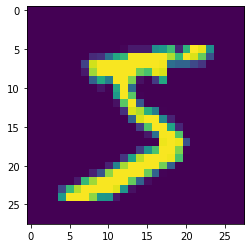

In [6]:
image, label = dataset[0]
plt.imshow(image)
print('Label:', label)

Label: 3


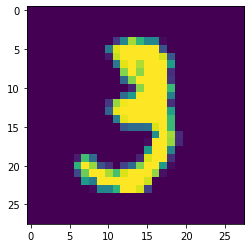

In [7]:
image, label = dataset[10]
plt.imshow(image)
print('Label:', label)

In [8]:
type(image)

PIL.Image.Image

In [9]:
# PyTorch datasets allow us to specify one or more transformation functions 
# which are applied to the images as they are loaded. torchvision.transforms 
# contains many such predefined functions, and we'll use the ToTensor transform 
# to convert images into PyTorch tensors.

import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [11]:
# The first dimension is used to keep track of the color channels.

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
# The values range from 0 to 1, with 0 representing black, 1 white and the 
# values in between different shades of grey. We can also plot the tensor as an 
# image using plt.imshow.

print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


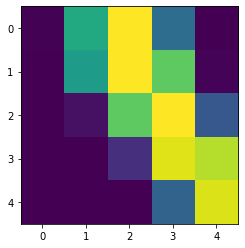

In [13]:
plt.imshow(img_tensor[0, 10:15, 10:15])

In [14]:
# Since there's no predefined validation set, we must manually split the 60,000 
# images into training and validation datasets. Let's set aside 10,000 randomly 
# chosen images for validation. We can do this using the random_spilt method 
# from PyTorch.

from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size, shuffle= True)

## Model

- A logistic regression model is almost identical to a linear regression model i.e. there are weights and bias matrices, and the output is obtained using simple matrix operations (pred = x @ w.t() + b).

- Just as we did with linear regression, we can use nn.Linear to create the model instead of defining and initializing the matrices manually.

- Since nn.Linear expects the each training example to be a vector, each 1x28x28 image tensor needs to be flattened out into a vector of size 784 (28*28), before being passed into the model.

- The output for each image is vector of size 10, with each element of the vector signifying the probability a particular target label (i.e. 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0032, -0.0093,  0.0293,  ...,  0.0076, -0.0356, -0.0254],
        [ 0.0057,  0.0124, -0.0010,  ..., -0.0068,  0.0079, -0.0292],
        [ 0.0067, -0.0068,  0.0102,  ..., -0.0197,  0.0253, -0.0291],
        ...,
        [ 0.0305, -0.0077,  0.0267,  ..., -0.0107,  0.0289,  0.0099],
        [-0.0118,  0.0285, -0.0178,  ..., -0.0234,  0.0231, -0.0180],
        [ 0.0199,  0.0205, -0.0011,  ..., -0.0033, -0.0340, -0.0345]],
       requires_grad=True)


In [18]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([ 0.0196, -0.0076,  0.0140, -0.0119, -0.0155, -0.0265, -0.0304,  0.0233,
         0.0173,  0.0197], requires_grad=True)


In [19]:
for images, labels in train_loader:
  print(labels.shape)
  print(images.shape)
  outputs = model(images)
  break

torch.Size([128])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

The errod was caused due to the fact 
that we have to reshape the input image into a 784 vector.

In [20]:
# We'll have to use the reshape method of a class.

# To include this additional functionality within our model, we need to define
# a custom model, by extending the nn.Module class from PyTorch.

# Inside the __init__ constructor method, we instantiate the weights and biases 
# using nn.Linear. And inside the forward method, which is invoked when we pass 
# a batch of inputs to the model, we flatten out the input tensor, and then 
# pass it into self.linear.

# xb.reshape(-1, 28*28) indicates to PyTorch that we want a view of the xb 
# tensor with two dimensions, where the length along the 2nd dimension is 
# 28*28 (i.e. 784). One argument to .reshape can be set to -1 (in this case 
# the first dimension), to let PyTorch figure it out automatically based on the 
# shape of the original tensor. Note that the model no longer has .weight and 
# .bias attributes (as they are now inside the .linear attribute), but it does 
# have a .parameters method which returns a list containing the weights and 
# bias, and can be used by a PyTorch optimizer.

class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

model = MnistModel()

In [21]:
print(model.linear.weight.shape,  model.linear.bias.shape)
print(model.parameters())
print(list(model.parameters()))

torch.Size([10, 784]) torch.Size([10])
<generator object Module.parameters at 0x7fcccd11e830>
[Parameter containing:
tensor([[-0.0320,  0.0175,  0.0118,  ..., -0.0035, -0.0257, -0.0172],
        [ 0.0244,  0.0086,  0.0270,  ...,  0.0357, -0.0127, -0.0091],
        [-0.0085, -0.0069, -0.0039,  ...,  0.0267, -0.0150,  0.0287],
        ...,
        [ 0.0218, -0.0278, -0.0337,  ...,  0.0305, -0.0284,  0.0059],
        [ 0.0171, -0.0168,  0.0251,  ...,  0.0296, -0.0297,  0.0268],
        [ 0.0334, -0.0240,  0.0289,  ..., -0.0168,  0.0161, -0.0281]],
       requires_grad=True), Parameter containing:
tensor([ 0.0059, -0.0340, -0.0294,  0.0109, -0.0264, -0.0308,  0.0003, -0.0262,
         0.0198, -0.0215], requires_grad=True)]


In [22]:
# Our custom model will be used in the same way as before.

for images, labels in train_loader:
  outputs = model(images)
  break

print('Outputs Shape:', outputs.shape)
print('Sample Outputs', outputs[:2])

Outputs Shape: torch.Size([128, 10])
Sample Outputs tensor([[-0.1485,  0.5361, -0.1906,  0.0128, -0.4672,  0.0966,  0.4874,  0.1563,
          0.2174, -0.1520],
        [-0.1247,  0.2416,  0.1828,  0.1214, -0.1028, -0.0709,  0.1682,  0.0683,
          0.0543,  0.0543]], grad_fn=<SliceBackward>)


In [23]:
# The softmax function is included in the torch.nn.functional package, and 
# requires us to specify a dimension along which the softmax must be applied.

import torch.nn.functional as F

# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:", probs[:2])

# Add the probabilities of an output row
print("Sum:", torch.sum(probs[0]))

Sample probabilities: tensor([[0.0781, 0.1549, 0.0749, 0.0918, 0.0568, 0.0998, 0.1475, 0.1059, 0.1126,
         0.0778],
        [0.0826, 0.1192, 0.1124, 0.1057, 0.0844, 0.0872, 0.1107, 0.1002, 0.0988,
         0.0988]], grad_fn=<SliceBackward>)
Sum: tensor(1., grad_fn=<SumBackward0>)


In [24]:
# We can determine the maximum predicted element by just taking the the maximum
# probability. We use torch.max to get the maximum.

max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 1, 5, 1, 6, 1, 1, 6, 6, 6, 6, 6, 6, 1, 6, 7, 7, 6, 6, 6, 1, 6, 6, 6,
        1, 6, 7, 7, 5, 1, 1, 1, 1, 1, 6, 8, 7, 1, 1, 0, 1, 1, 7, 1, 6, 0, 6, 1,
        0, 6, 1, 6, 1, 6, 1, 1, 6, 0, 6, 1, 6, 6, 1, 2, 6, 1, 8, 6, 1, 1, 6, 6,
        6, 1, 6, 6, 6, 8, 1, 6, 6, 1, 7, 1, 1, 1, 1, 8, 1, 1, 7, 0, 6, 1, 1, 1,
        6, 0, 5, 1, 1, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 1, 1, 1, 6, 1, 3, 7,
        6, 6, 1, 6, 6, 6, 8, 5])
tensor([0.1549, 0.1192, 0.1330, 0.1309, 0.1652, 0.1603, 0.1586, 0.1311, 0.1354,
        0.1750, 0.1360, 0.1147, 0.1520, 0.1291, 0.1429, 0.1314, 0.1289, 0.1615,
        0.1462, 0.1176, 0.1180, 0.1271, 0.1486, 0.1498, 0.1429, 0.1451, 0.1225,
        0.1225, 0.1215, 0.1344, 0.1267, 0.1214, 0.1354, 0.1510, 0.1532, 0.1177,
        0.1146, 0.1103, 0.1350, 0.1269, 0.1704, 0.1297, 0.1302, 0.1654, 0.1453,
        0.1418, 0.1650, 0.1502, 0.1396, 0.1145, 0.1667, 0.1749, 0.1224, 0.1529,
        0.1388, 0.1527, 0.1331, 0.1134, 0.1476, 0.1349, 0.1352, 0.1416, 0.1447,
       

## Evaluation Metrics and Accuracy



In [25]:
# Use torch.Tensor.item() to get a Python number from a tensor containing a single value:

# >>> x = torch.tensor([[1]])
# >>> x
# tensor([[ 1]])
# >>> x.item()
# 1
# >>> x = torch.tensor(2.5)
# >>> x
# tensor(2.5000)
# >>> x.item()
# 2.5

def accuracy(outputs, labels):
  _ , preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==label).item() / len(preds))

In [26]:
accuracy(outputs, labels)

tensor(0.0391)

In [28]:
loss_function = F.cross_entropy
loss_function(outputs, labels)

tensor(2.2867, grad_fn=<NllLossBackward>)

## Training the Model


In [46]:
# for epoch in range(num_epochs):
    # Training phase
    # for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    # for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

    # torch.stack: https://pytorch.org/docs/stable/generated/torch.stack.html

class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out
  
  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss
  
  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean() # Combine Losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean() # Combine Acc and get the mean 
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
  def epoch_end(self, epoch, result):
      print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


In [47]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    # Training
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    # Validation
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [48]:
model = MnistModel()

In [49]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.00019778481510002166, 'val_loss': 2.3067009449005127}

In [50]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9338, val_acc: 0.0021
Epoch [1], val_loss: 1.6687, val_acc: 0.0072
Epoch [2], val_loss: 1.4725, val_acc: 0.0160
Epoch [3], val_loss: 1.3239, val_acc: 0.0271
Epoch [4], val_loss: 1.2086, val_acc: 0.0357


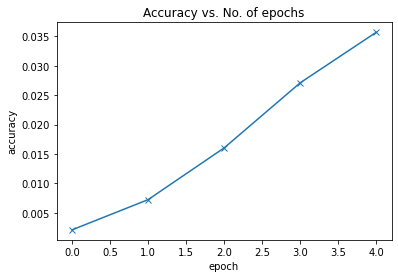

In [53]:
history = [history1]
accuracies = [result['val_acc'] for result in history1]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with Individual Images

In [54]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


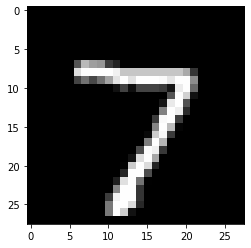

In [55]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [58]:
# img.unsqueeze simply adds another dimension at the begining of the 1x28x28 
# tensor, making it a 1x1x28x28 tensor, which the model views as a batch 
# containing a single image.

img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [59]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


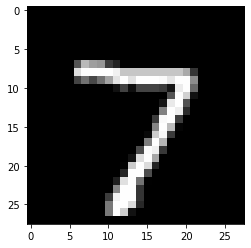

In [60]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [62]:
# Testing the model on the test dataset

test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.103515625, 'val_loss': 1.179037094116211}

## Save and Load the Model

In [63]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [64]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0193, -0.0067,  0.0294,  ..., -0.0158,  0.0040,  0.0089],
                      [-0.0243,  0.0073,  0.0103,  ...,  0.0147,  0.0072,  0.0259],
                      [-0.0349,  0.0068, -0.0247,  ...,  0.0077, -0.0099,  0.0159],
                      ...,
                      [-0.0279,  0.0166, -0.0051,  ..., -0.0082, -0.0179,  0.0022],
                      [ 0.0148,  0.0301, -0.0189,  ...,  0.0318,  0.0219,  0.0331],
                      [ 0.0353,  0.0022,  0.0325,  ..., -0.0307,  0.0107,  0.0339]])),
             ('linear.bias',
              tensor([ 0.0052,  0.0162,  0.0034,  0.0168,  0.0097, -0.0172,  0.0122,  0.0076,
                      -0.0386, -0.0179]))])

In [65]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0193, -0.0067,  0.0294,  ..., -0.0158,  0.0040,  0.0089],
                      [-0.0243,  0.0073,  0.0103,  ...,  0.0147,  0.0072,  0.0259],
                      [-0.0349,  0.0068, -0.0247,  ...,  0.0077, -0.0099,  0.0159],
                      ...,
                      [-0.0279,  0.0166, -0.0051,  ..., -0.0082, -0.0179,  0.0022],
                      [ 0.0148,  0.0301, -0.0189,  ...,  0.0318,  0.0219,  0.0331],
                      [ 0.0353,  0.0022,  0.0325,  ..., -0.0307,  0.0107,  0.0339]])),
             ('linear.bias',
              tensor([ 0.0052,  0.0162,  0.0034,  0.0168,  0.0097, -0.0172,  0.0122,  0.0076,
                      -0.0386, -0.0179]))])

In [66]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.103515625, 'val_loss': 1.179037094116211}